<a href="https://colab.research.google.com/github/Nanashi-bot/AmazonMLOCR/blob/main/amazonml1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

train_df = pd.read_csv("/content/train.csv")

In [ ]:
train_df.head(2)

,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/61I9XdN6OF...,748919,item_weight,500.0 gram
1,https://m.media-amazon.com/images/I/71gSRbyXmo...,916768,item_volume,1.0 cup


In [ ]:
len(train_df.group_id.unique())

750

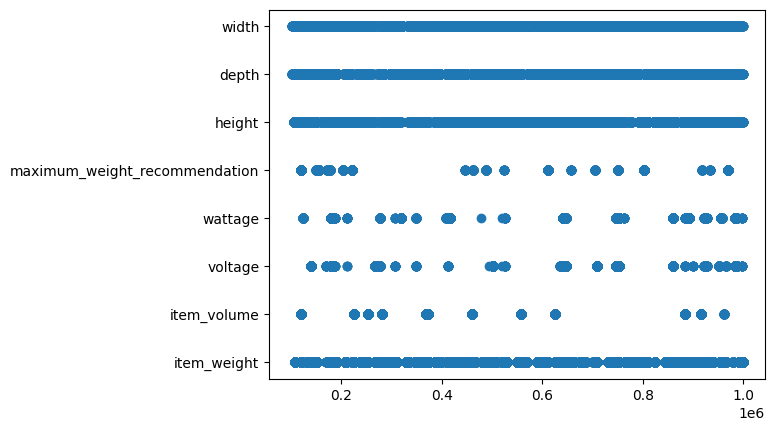

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(train_df.group_id, train_df.entity_name)

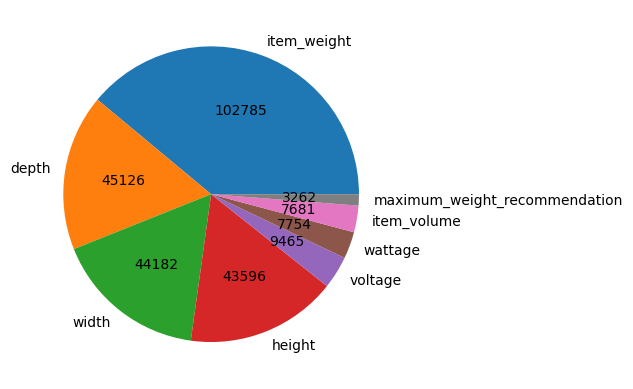

In [ ]:
x = train_df.entity_name.value_counts()

plt.pie(x, labels=x.index, autopct=lambda p: f'{int(p * sum(x) / 100)}')
plt.show()

In [ ]:
train_df_weight = train_df[train_df['entity_name'] == 'item_weight']

In [ ]:
train_df_weight["image_link"][0]

'https://m.media-amazon.com/images/I/61I9XdN6OFL.jpg'

In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 22.4 MB/s eta 0:00:00


In [ ]:
import easyocr
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
image_url = "https://m.media-amazon.com/images/I/61I9XdN6OFL.jpg"
def show_img(image_url):
  response = requests.get(image_url)
  img = Image.open(BytesIO(response.content))

  # Display the image
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [ ]:
# Initialize the EasyOCR Reader
reader = easyocr.Reader(['en'])

def ocr(image_url):
  results = reader.readtext(image_url)
  x = []
  for result in results:
      x.append(result[1])
      # text= result[1]
      # print(f"Detected text: '{text}'")
  return x

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:85: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

In [ ]:
x = np.array(train_df_weight.entity_value)
units = []
c = 0
for i in x:
  z = (i.split(' ')[-1])
  if z == "1kilogram":
    print(c)
  units.append(z)
  c+=1
print(set(units))

25049
25634
47482
47484
47485
62233
{'inch', 'watt', 'ounce', '1kilogram', 'litre', 'quart', '2kilogram', 'pound', 'millilitre', 'nits', 'ton', 'cup', 'millimetre', 'kilogram', 'microgram', 'milligram', 'centimetre', 'gigabyte', 'candela', 'carat', 'gram'}


In [ ]:
train_df_weight['image_link'].iloc[25049]

'https://m.media-amazon.com/images/I/81CienQRpRL.jpg'

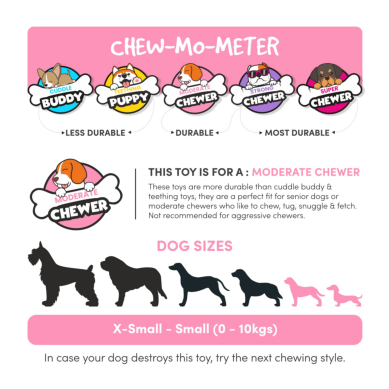

Progress: |██████████████████████████████████████████████████| 101.0% Complete

['chEw-Mo-METER',
 'LESS DURABLE',
 'DURABLE',
 'MOST DURABLE',
 'THIS TOY IS FORA : MODERATE CHEWER',
 'These toys are more durable than cuddle buddy &',
 'teething toys, they are a perfect fit for senior dogs or',
 'moderate chewers who like to chew; tug, snuggle & fetch:',
 'Not recommended for aggressive chewers.',
 'DOG SIZES',
 'X-Small',
 '5',
 'Small (0 - 1Okgs)',
 'In case your dog destroys this',
 'try the next chewing style:',
 'MUDERATE',
 'CUDDLE',
 'TEETHING',
 'STRONG',
 'SUPER',
 'CHEWER',
 'CHEWER',
 'CHEWER',
 'BUDDY',
 'PUpps',
 'MODERATE',
 'CHEWER',
 'toy,']

In [ ]:
show_img("https://m.media-amazon.com/images/I/81CienQRpRL.jpg")
ocr("https://m.media-amazon.com/images/I/81CienQRpRL.jpg")

In [ ]:
keywords = ["kg","g",""]
set(units)

{'1kilogram',
 '2kilogram',
 'candela',
 'carat',
 'centimetre',
 'cup',
 'gigabyte',
 'gram',
 'inch',
 'kilogram',
 'litre',
 'microgram',
 'milligram',
 'millilitre',
 'millimetre',
 'nits',
 'ounce',
 'pound',
 'quart',
 'ton',
 'watt'}

In [ ]:
# FOR VOLTAGE

In [ ]:
train_df_voltage = train_df[train_df['entity_name'] == 'voltage']

In [ ]:
x = np.array(train_df_voltage.entity_value)
units = []
c = 0
for i in x:
  z = (i.split(' ')[-1])
  units.append(z)
  c+=1
print(set(units))

{'volt'}


In [ ]:
import re

for i in range(len(train_df_voltage[:10])):
    z = ocr(train_df_voltage["image_link"].iloc[i])
    print("\nFrom training data:")
    print(train_df_voltage["entity_value"].iloc[i])
    pattern_volt = r'(\d+)\s*v(olt)?\b'
    for i in z:
      match = re.search(pattern_volt, i, re.IGNORECASE)
      if match:
        # Print the number and the voltage unit
        print("Found:", match.group(1), match.group(2) or 'V')

Progress: |███████████████████████████████████████████████████| 103.1% Complete
From training data:
48.0 volt
Found: 48 V
Found: 48 V
Progress: |█████████████████████████████████████████████████████| 106.2% Complete
From training data:
36.0 volt
Found: 36 V
Progress: |██████████████████████████████████████████████████| 102.0% Complete
From training data:
[100.0, 240.0] volt
Found: 240 V
Progress: |██████████████████████████████████████████████████| 101.8% Complete
From training data:
12.0 volt
Progress: |██████████████████████████████████████████████████| 100.7% Complete
From training data:
12.0 volt
Progress: |██████████████████████████████████████████████████| 100.9% Complete
From training data:
12.0 volt
Progress: |████████████████████████████████████████████████████| 104.9% Complete
From training data:
12.0 volt
Progress: |██████████████████████████████████████████████████| 100.6% Complete
From training data:
12.0 volt
Progress: |██████████████████████████████████████████████████| 

In [ ]:
z = ocr(train_df_voltage["image_link"].iloc[3])
print("\nFrom training data:")
print(train_df_voltage["entity_value"].iloc[3])
pattern_volt = r'(\d+)\s*v(olt)?\b'
for i in z:
  match = re.search(pattern_volt, i, re.IGNORECASE)
  if match:
    print("Found:", match.group(1), match.group(2) or 'V')

Progress: |██████████████████████████████████████████████████| 101.8% Complete
From training data:
12.0 volt


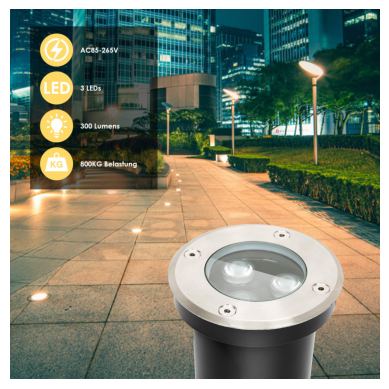

In [ ]:
show_img(train_df_voltage["image_link"].iloc[8])

In [ ]:
test_df = pd.read_csv("/content/test.csv")

In [ ]:
test_df

,index,image_link,group_id,entity_name
0,0,https://m.media-amazon.com/images/I/110EibNycl...,156839,height
1,1,https://m.media-amazon.com/images/I/11TU2clswz...,792578,width
2,2,https://m.media-amazon.com/images/I/11TU2clswz...,792578,height
3,3,https://m.media-amazon.com/images/I/11TU2clswz...,792578,depth
4,4,https://m.media-amazon.com/images/I/11gHj8dhhr...,792578,depth
...,...,...,...,...
131182,131283,https://m.media-amazon.com/images/I/A1rVsIzEtk...,721522,maximum_weight_recommendation
131183,131284,https://m.media-amazon.com/images/I/A1rdvZ5zDd...,603688,item_weight
131184,131285,https://m.media-amazon.com/images/I/A1rdvZ5zDd...,603688,maximum_weight_recommendation
131185,131286,https://m.media-amazon.com/images/I/A1tnTUPyr7...,853009,item_weight


In [ ]:
import pandas as pd

predictions = []

pred_df = pd.DataFrame({
    'prediction': predictions
})

pred_df.index.name = 'index'

In [ ]:
volt_pred_df = test_df[test_df['entity_name']=="voltage"]

In [ ]:
volt_pred_df

,index,image_link,group_id,entity_name
19,19,https://m.media-amazon.com/images/I/218BCzgKxu...,348551,voltage
37,37,https://m.media-amazon.com/images/I/21cLufe8Y5...,648011,voltage
60,60,https://m.media-amazon.com/images/I/21tOerzlVM...,957050,voltage
65,65,https://m.media-amazon.com/images/I/21vv80MKQE...,709627,voltage
75,75,https://m.media-amazon.com/images/I/31+1xiVjZB...,997176,voltage
...,...,...,...,...
131087,131188,https://m.media-amazon.com/images/I/91vij4ee-G...,240413,voltage
131114,131215,https://m.media-amazon.com/images/I/91xOwqGhSV...,240413,voltage
131123,131224,https://m.media-amazon.com/images/I/91xm1-3iQs...,240413,voltage
131124,131225,https://m.media-amazon.com/images/I/91xp-halWC...,983323,voltage


In [ ]:
for i in volt_pred_df.index:
    z = ocr(volt_pred_df["image_link"].iloc[i])
    pattern = r'(\d+)\s*v(olt)?\b'
    for j in z:
      match = re.search(pattern, j, re.IGNORECASE)
      if match:
        print("\nFound:", match.group(1), match.group(2) or 'V')
        pred_df.loc[i] = match.group(1) + " volt"

Progress: |██████████████████████████████████████████████████████████████████| 133.7% Complete
Found: 220 V
Progress: |██████████████████████████████████████████████████████| 109.9% Complete
Found: 230 V
Progress: |█████████████████████████████████████████████████████████| 115.6% Complete
Found: 12 V
Progress: |███████████████████████████████████████████████████████████████| 126.6% Complete
Found: 5 V
Progress: |██████████████████████████████████████████████████████████| 117.1% Complete
Found: 110 V
Progress: |███████████████████████████████████████████████████| 102.4% Complete
Found: 220 V
Progress: |█████████████████████████████████████████████████████████████████| 130.5% Complete
Found: 240 V
Progress: |███████████████████████████████████████████████████| 102.7% Complete
Found: 120 olt
Progress: |████████████████████████████████████████████████████████| 113.5% Complete
Found: 220 V
Progress: |██████████████████████████████████████████████████| 100.4% Complete
Found: 110 V

Found: 11

IndexError: single positional indexer is out-of-bounds

In [ ]:
pred_df

,prediction
index,
65,220 volt
323,230 volt
334,12 volt
384,5 volt
388,110 volt
...,...
5457,2 volt
5459,2 volt
5464,12 volt


In [ ]:
# FOR WATTAGE

train_df_wattage = train_df[train_df['entity_name'] == 'wattage']
x = np.array(train_df_wattage.entity_value)
units = []
c = 0
for i in x:
  z = (i.split(' ')[-1])
  units.append(z)
  c+=1
print(set(units))

{'hour', 'watt', 'kilowatt', 'horsepower'}


In [ ]:
import re

for i in range(len(train_df_wattage[:1])):
    z = ocr(train_df_wattage["image_link"].iloc[4292])
    print("\nFrom training data:")
    print(train_df_wattage["entity_value"].iloc[4292])
    pattern_watt = r"(\d+)\s*(kWh|w|Watt|P)"

    # Dictionary to map the units to their full form
    unit_mapping = {
        'kWh': 'kilowatt hour',
        'w': 'watt',
        'Watt': 'watt',
        'P': 'horsepower',
        'p': 'horsepower',
    }

    for i in z:
        matches = re.search(pattern_watt, i, re.IGNORECASE)  # Use re.search() to find one match
        if matches:
            number = matches.group(1)  # Extract the number (group 1)
            unit = matches.group(2)    # Extract the unit (group 2)
            full_unit = unit_mapping.get(unit.lower())  # Normalize case and get full unit name
            print(f"{float(number)} {full_unit}")
            break

Progress: |██████████████████████████████████████████████████| 100.7% Complete
From training data:
4320.0 horsepower
4320.0 horsepower


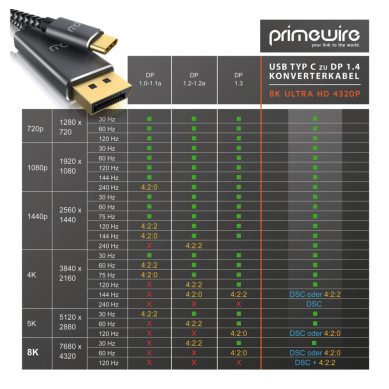

Progress: |██████████████████████████████████████████████████| 100.7% Complete

['princUirc',
 'your link to the world',
 'USB TYP C zU DP 1.4',
 'DP',
 'DP',
 'DP',
 'KONVERTERKABEL',
 '1.0-1.1a',
 '1.2-1.2a',
 '1.3',
 '8K',
 'ULTRA',
 'HD 4320P',
 '30 Hz',
 '1280 X',
 '720p',
 '720',
 '60 Hz',
 '120 Hz',
 '30 Hz',
 '60 Hz',
 '1920 X',
 '108Op',
 '1080',
 '120 Hz',
 '144 Hz',
 '240 Hz',
 '4.2.0',
 '30 Hz',
 '60 Hz',
 '2560 X',
 '1440p',
 '1440',
 '75 Hz',
 '120 Hz',
 '4.2.2',
 '144 Hz',
 '4.2.0',
 '240 Hz',
 '4.22.2',
 '30 Hz',
 '60 Hz',
 '4.2.2',
 '3840 X',
 '4K',
 '75 Hz',
 '4.2.0',
 '2160',
 '120 Hz',
 '4.2.2',
 '144 Hz',
 '4.22.0',
 '4.2.2',
 'DSC oder 4.2.2',
 '240 Hz',
 'DSC',
 '30 Hz',
 '4.2.2',
 '5120 X',
 '5k',
 '60 Hz',
 '4.22.2',
 '2880',
 '120 Hz',
 '4.2.0',
 'DSC oder 4.2.0',
 '30 Hz',
 'X',
 '4.22.2',
 '7680 X',
 '8K',
 '60 Hz',
 '4.2.0',
 'DSC oder 4.2.0',
 '4320',
 '120 Hz',
 'DSC',
 '+',
 '4.22.2',
 'Co',
 'GC']

In [ ]:
show_img(train_df_wattage["image_link"].iloc[4292])
ocr(train_df_wattage["image_link"].iloc[4292])

In [ ]:
# Checking examples for each type of unit

a = 0
for i in x:
  z = (i.split(' ')[-1])
  if z == "horsepower":
    print("Entity value: ",i)
    print("Index: ",a,"\n")
  a+=1

Entity value:  3.0 horsepower
Index:  51 

Entity value:  1080.0 horsepower
Index:  57 

Entity value:  1080.0 horsepower
Index:  64 

Entity value:  1080.0 horsepower
Index:  132 

Entity value:  1080.0 horsepower
Index:  146 

Entity value:  1080.0 horsepower
Index:  183 

Entity value:  1080.0 horsepower
Index:  197 

Entity value:  1080.0 horsepower
Index:  200 

Entity value:  104.0 horsepower
Index:  249 

Entity value:  1080.0 horsepower
Index:  284 

Entity value:  720.0 horsepower
Index:  321 

Entity value:  2160.0 horsepower
Index:  372 

Entity value:  2160.0 horsepower
Index:  373 

Entity value:  2160.0 horsepower
Index:  374 

Entity value:  1080.0 horsepower
Index:  427 

Entity value:  1080.0 horsepower
Index:  503 

Entity value:  1080.0 horsepower
Index:  505 

Entity value:  1080.0 horsepower
Index:  545 

Entity value:  1080.0 horsepower
Index:  560 

Entity value:  1080.0 horsepower
Index:  565 

Entity value:  960.0 horsepower
Index:  584 

Entity value:  1080.0 

In [ ]:
watt_pred_df = test_df[test_df['entity_name']=="wattage"]

In [ ]:
for i in watt_pred_df.index:
    z = ocr(watt_pred_df["image_link"].iloc[i])
    pattern_watt = r"(\d+)\s*(kWh|w|Watt|P)"
    # Dictionary to map the units to their full form
    unit_mapping = {
        'kWh': 'kilowatt hour',
        'w': 'watt',
        'Watt': 'watt',
        'P': 'horsepower',
        'p': 'horsepower',
    }
    for i in z:
        matches = re.search(pattern_watt, i, re.IGNORECASE)
        if matches:
            number = matches.group(1)
            unit = matches.group(2)
            full_unit = unit_mapping.get(unit.lower())
            print(f"{float(number)} {full_unit}")
            pred_df.loc[i] = f"{float(number)} {full_unit}"
            break

Progress: |███████████████████████████████████████████████████████████████████████████████████| 166.5% Complete120.0 watt
Progress: |███████████████████████████████████████████████████████████| 118.7% Complete2930.0 watt
Progress: |███████████████████████████████████████████████████████████████████| 134.6% Complete100.0 watt
Progress: |███████████████████████████████████████████████████| 103.6% Complete1300.0 watt
Progress: |████████████████████████████████████████████████████| 105.2% Complete1800.0 watt
Progress: |███████████████████████████████████████████████████| 103.5% Complete38.0 watt
Progress: |███████████████████████████████████████████████████| 102.9% Complete120.0 watt
Progress: |████████████████████████████████████████████████████████████████| 128.8% Complete12.0 watt
Progress: |██████████████████████████████████████████████████| 101.0% Complete2.0 watt
Progress: |████████████████████████████████████████████████████████████| 120.9% Complete1500.0 watt
Progress: |███████████

KeyboardInterrupt: 

In [ ]:
# FOR VOLUME

In [ ]:
train_df_volume = train_df[train_df['entity_name'] == 'item_volume']
x = np.array(train_df_volume.entity_value)
units = []
c = 0
for i in x:
  z = (i.split(' ')[-1])
  units.append(z)
  c+=1
print(set(units))

{'centilitre', 'gallon', 'inch', 'foot', 'ounce', 'quart', 'litre', 'millilitre', 'cup', 'pint', 'decilitre'}


In [ ]:
import re

for i in range(len(train_df_volume[:3])):
    z = ocr(train_df_wattage["image_link"].iloc[i])
    print("\nFrom training data:")
    print(train_df_volume["entity_value"].iloc[i])
    pattern_volume = r"(\d+\.?\d*)\s*(centilitre|cl|gallon|inch|foot|ounce|oz|quart|litre|liter|ml|millilitre|cup|pint|decilitre|dl)"

    unit_mapping = {
        'centilitre': 'centilitre (cl)',
        'cl': 'centilitre (cl)',
        'gallon': 'gallon',
        'inch': 'inch',
        'foot': 'foot',
        'ounce': 'ounce (oz)',
        'oz': 'ounce (oz)',
        'quart': 'quart',
        'litre': 'litre (L)',
        'liter': 'litre (L)',
        'millilitre': 'millilitre (ml)',
        'ml': 'millilitre (ml)',
        'cup': 'cup',
        'pint': 'pint',
        'decilitre': 'decilitre (dl)',
        'dl': 'decilitre (dl)'
    }

    # Loop over each string in z
    for i in z:
        matches = re.search(pattern_volume, i, re.IGNORECASE)  # Use re.search() to find one match
        if matches:
            number = matches.group(1)  # Extract the number (group 1)
            unit = matches.group(2).lower()  # Normalize case by converting the unit to lowercase
            full_unit = unit_mapping.get(unit)  # Get full unit name and abbreviation
            if full_unit:
                print(f"{number} {full_unit}")

Progress: |█████████████████████████████████████████████████████| 106.2% Complete
From training data:
1.0 cup
Progress: |███████████████████████████████████████████████████| 102.6% Complete
From training data:
4.0 gallon
Progress: |███████████████████████████████████████████████████| 102.9% Complete
From training data:
10.0 ounce


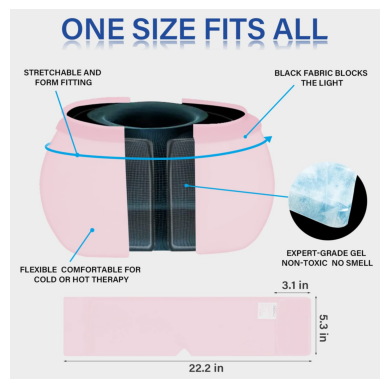

Progress: |████████████████████████████████████████████████████| 104.5% Complete

['ONE SIZE FITS ALL',
 'STRETCHABLE AND',
 'BLACK FABRIC BLOCKS',
 'FORM FITTING',
 'THE LIGHT',
 'EXPERT-GRADE GEL',
 'NON-TOXIC',
 'NO SMELL',
 'FLEXIBLE',
 'COMFORTABLE FOR',
 'COLD OR HOT THERAPY',
 '3.1in',
 '@',
 '5',
 '22.2 in']

In [ ]:
show_img(train_df_volume["image_link"].iloc[1])
ocr(train_df_volume["image_link"].iloc[1])

In [ ]:
# Checking examples for each type of unit

a = 0
for i in x:
  z = (i.split(' ')[-1])
  if z == "cup":
    print("Entity value: ",i)
    print("Index: ",a,"\n")
  a+=1

Entity value:  1.0 cup
Index:  0 

Entity value:  1.0 cup
Index:  211 

Entity value:  4.0 cup
Index:  584 

Entity value:  90.0 cup
Index:  673 

Entity value:  24.0 cup
Index:  762 

Entity value:  24.0 cup
Index:  768 

Entity value:  4.0 cup
Index:  798 

Entity value:  24.0 cup
Index:  896 

Entity value:  1.0 cup
Index:  941 

Entity value:  1.0 cup
Index:  942 

Entity value:  2.0 cup
Index:  946 

Entity value:  2.5 cup
Index:  955 

Entity value:  1.0 cup
Index:  1159 

Entity value:  12.0 cup
Index:  1167 

Entity value:  4.0 cup
Index:  1301 

Entity value:  4.0 cup
Index:  1302 

Entity value:  24.0 cup
Index:  1432 

Entity value:  10.0 cup
Index:  1433 

Entity value:  30.0 cup
Index:  1464 

Entity value:  0.5 cup
Index:  1471 

Entity value:  24.0 cup
Index:  1473 

Entity value:  10.0 cup
Index:  1510 

Entity value:  0.2 cup
Index:  1595 

Entity value:  0.75 cup
Index:  1746 

Entity value:  0.5 cup
Index:  1747 

Entity value:  3.0 cup
Index:  1796 

Entity value:  

In [ ]:
volume_pred_df = test_df[test_df['entity_name']=="item_volume"]

In [ ]:
for i in volume_pred_df.index:
    z = ocr(volume_pred_df["image_link"].iloc[i])
    pattern_volume = r"(\d+\.?\d*)\s*(centilitre|cl|gallon|inch|foot|ounce|oz|quart|litre|liter|ml|millilitre|cup|pint|decilitre|dl)"

    unit_mapping = {
        'centilitre': 'centilitre',
        'cl': 'centilitre',
        'gallon': 'gallon',
        'inch': 'inch',
        'foot': 'foot',
        'ounce': 'ounce',
        'oz': 'ounce',
        'quart': 'quart',
        'litre': 'litre',
        'liter': 'litre',
        'millilitre': 'millilitre',
        'ml': 'millilitre',
        'cup': 'cup',
        'pint': 'pint',
        'decilitre': 'decilitre',
        'dl': 'decilitre'
    }

    # Loop over each string in z
    for i in z:
        matches = re.search(pattern_volume, i, re.IGNORECASE)  # Use re.search() to find one match
        if matches:
            number = matches.group(1)  # Extract the number (group 1)
            unit = matches.group(2).lower()  # Normalize case by converting the unit to lowercase
            full_unit = unit_mapping.get(unit)  # Get full unit name and abbreviation
            if full_unit:
                print(f"{number} {full_unit}")

Progress: |████████████████████████████████████████████████████████████████| 128.8% Complete1.57 inch
Progress: |███████████████████████████████████████████████████| 103.7% Complete350 millilitre (ml)
Progress: |███████████████████████████████████████████████████| 102.9% Complete6 inch
Progress: |███████████████████████████████████████████████████████████| 118.9% Complete

KeyboardInterrupt: 

In [ ]:
# FOR MAXIMUM WEIGHT RECOMMENDATION AND ITEM_WEIGHT

In [ ]:
# FOR HEIGHT WIDTH AND DEPTH